In [3]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy 
import cmocean 
import cartopy.crs as ccrs 

In [4]:
#GOALS: 
#Correlation matrix between the ngpus and the norksy800
#Spectral analysis between the ngpus and the norkyst800
#plot f/h as contourlines with u & v
ds = xr.open_dataset(f'/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc')

In [5]:
ds

<xarray.Dataset> Size: 5GB
Dimensions:            (time: 17, values: 3076056)
Coordinates:
  * time               (time) datetime64[ns] 136B 2024-04-02 ... 2024-04-04
Dimensions without coordinates: values
Data variables: (12/27)
    latitude           (values) float32 12MB ...
    longitude          (values) float32 12MB ...
    h                  (time, values) float32 209MB ...
    salinity_0         (time, values) float32 209MB ...
    sea_mask           (time, values) float32 209MB ...
    temperature_0      (time, values) float32 209MB ...
    ...                 ...
    rain               (time, values) float32 209MB ...
    river_binary_mask  (time, values) float32 209MB ...
    sin_julian_day     (time, values) float32 209MB ...
    sin_latitude       (time, values) float32 209MB ...
    sin_local_time     (time, values) float32 209MB ...
    sin_longitude      (time, values) float32 209MB ...

In [6]:
import numpy as np
import math
%pip install opencv-python 
import cv2

Note: you may need to restart the kernel to use updated packages.


Spectral analysis

In [111]:
m = 8
n = 8

def dc_transform(matrix):
    pi = math.pi
    cos = math.cos
    dct = []
    variance = []
    for i in range(m):
        dct.append([None]*n)
        variance.append([None]*n)

    for i in range(m):
        for j in range(n):
            
            if (i==0):
                beta_m = np.sqrt(1/(m))

            elif (i!=0):
                beta_m = np.sqrt(2/(m))
            
            if (j==0):
                beta_n = np.sqrt(1/(n))
            elif (j!=0):
                beta_n = np.sqrt(2/(n))

            sum_dir = 0 
            for k in range(m):
                for l in range(n):

                    dct_dir_sum = matrix[k][l] * cos((pi * k * (i+0.5))/m) * cos((pi * l * (j+0.5))/n)  
                    sum_dir += dct_dir_sum
            
            dct[i][j] = beta_m * beta_n * sum_dir
            print (dct[i][j])

            sum_matrix = 0
            for row in matrix:
                for value in row:
                    sum_matrix += value

            domain_avg = sum_matrix / (m*n)
            
                             
            #variance
            sum_var = 0
            for k in range(m):
                for l in range(n):
                    var = (matrix[k][l] - (domain_avg))**2
                    sum_var += var

            variance[i][j] = (1/m) * (1/n) * sum_var
            #print(variance[i][j])
    print(f'The domain average is {domain_avg}')    
    return f'The dct matrix is: {dct[i][j]}, the variance matrix is: {variance[i][j]}'


$f(m,n) = \beta (m) \beta (n) \cdot \sum_{i=0}^{i=N_i-1} \sum_{j=0}^{j=N_j -1} f(i,j) \times cos(\frac{(i + 1/2) \cdot \pi \cdot k}{m}) \cdot cos(\frac{(j + 1/2) \cdot \pi \cdot l}{n})$

In [56]:
ds
lat = ds["latitude"]
lon = ds["longitude"]
temp = ds["temperature_0"]
salinity = ds["salinity_0"]
print(ds.temperature_0.values)
speed_u  = ds["u_eastward_0"]
speed_v = ds["v_northward_0"]

[[        nan         nan         nan ... -1.0870008  -1.0960007
  -1.0970001 ]
 [        nan         nan         nan ... -1.1005763  -1.1094631
  -1.1113447 ]
 [        nan         nan         nan ... -1.0311667  -1.0387701
  -1.040224  ]
 ...
 [        nan         nan         nan ... -0.90757436 -0.9193153
  -0.9255016 ]
 [        nan         nan         nan ... -0.79410195 -0.8062707
  -0.81309867]
 [        nan         nan         nan ... -0.7360289  -0.74862546
  -0.75588125]]


In [57]:

#plt.scatter(lon, lat, c = temp.isel(time=0).values)
#plt.colorbar()

In [58]:
#plt.scatter(lon,lat, c=speed_u.isel(time=0).values, vmax = 0.5, vmin = -1)
#plt.colorbar()

In [59]:
#plt.scatter(lon,lat,c=speed_v.isel(time=0).values)
#plt.colorbar()

In [60]:

path_temp_fig = f'/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures/temp_result_ngpus.jpg'


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90 

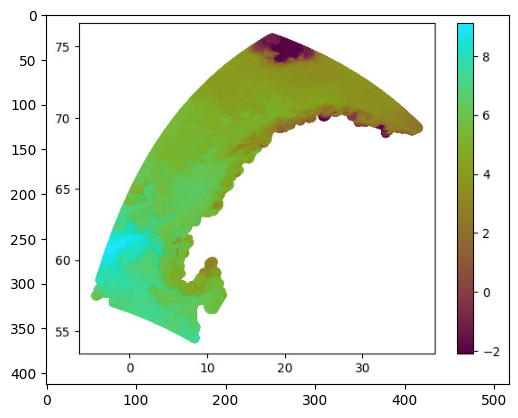

In [75]:
read = cv2.imread(path_temp_fig)
#read.shape
print(read)
print(np.unique(read))
plt.imshow(read)

In [112]:
dct_temp, variance_temp = dc_transform(read)
np.shape(variance_temp)[1]


[991.25838976 991.25838976 991.25838976]
[-288.65626943 -288.65626943 -288.65626943]
[360.841786 360.841786 360.841786]
[-27.46388587 -27.46388587 -27.46388587]
[228.84259826 228.84259826 228.84259826]
[58.50767398 58.50767398 58.50767398]
[163.81870488 163.81870488 163.81870488]
[113.31134885 113.31134885 113.31134885]
[-288.65626943 -288.65626943 -288.65626943]
[84.05723749 84.05723749 84.05723749]
[-105.07779291 -105.07779291 -105.07779291]
[7.99753417 7.99753417 7.99753417]
[-66.63938624 -66.63938624 -66.63938624]
[-17.03754246 -17.03754246 -17.03754246]
[-47.70430868 -47.70430868 -47.70430868]
[-32.99647355 -32.99647355 -32.99647355]
[360.841786 360.841786 360.841786]
[-105.07779291 -105.07779291 -105.07779291]
[131.35504917 131.35504917 131.35504917]
[-9.99751198 -9.99751198 -9.99751198]
[83.30418458 83.30418458 83.30418458]
[21.29819408 21.29819408 21.29819408]
[59.63393063 59.63393063 59.63393063]
[41.24804381 41.24804381 41.24804381]
[-27.46388587 -27.46388587 -27.46388587]
[7

ValueError: too many values to unpack (expected 2)

In [113]:
variance_temp

[[array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602])],
 [array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602]),
  array([64523.93774414, 64500.12597656, 63669.48266602])],
 [array([64523.93774414, 64500.12597656, 63669.4826660

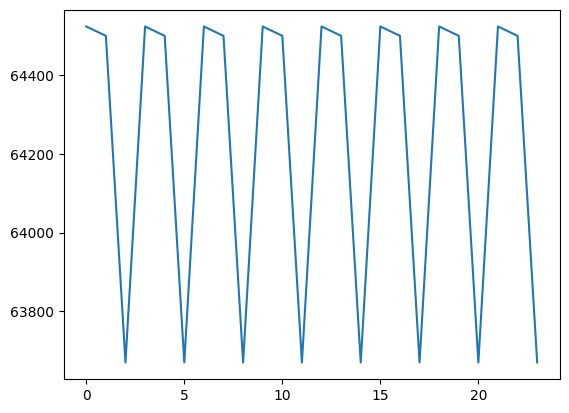

In [114]:
#plt.imshow(dct_temp)
#plt.colorbar()
np.shape(variance_temp[1])
plt.plot(range(24), np.ravel(variance_temp[0]))

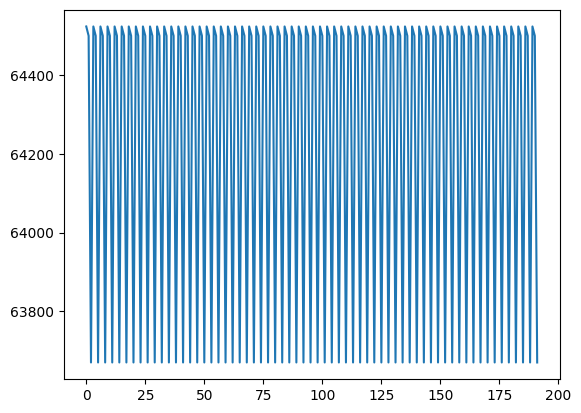

In [100]:
plt.plot(range(192), np.ravel(variance_temp))

In [ ]:
print(variance_temp)
res = all(isinstance(ele, list) for ele in variance_temp)
#Sjekker om det er noe feil med formen på varians-temp
print(f'Is variance_temp a matrix? {res}')

[[array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602])], [array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64500.12597656, 63669.48266602])], [array([64523.93774414, 64500.12597656, 63669.48266602]), array([64523.93774414, 64